# Graph coloring problem
Given an undirected graph and a set of colors, color the graph so that adjacent nodes are different colors

In [1]:
# import necessary packages
import time
import numpy as np
import numpy.random as random

import dimod
import networkx as nx

from dwave.system.samplers import LeapHybridCQMSampler

## Generate graph
(started with graph from Glover's tutorial)

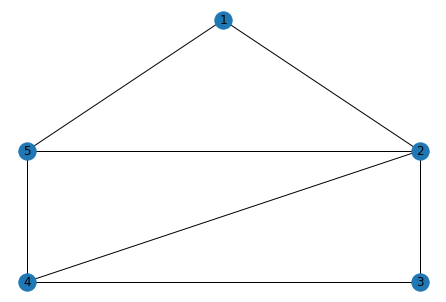

In [2]:
# graph from glover
graph = nx.Graph()
graph.add_nodes_from([1,5])
graph.add_edges_from([(1,2),(1,5),(2,3),(2,4),(2,5),(3,4),(4,5)])

# house positions
pos = {1: (0.5, 2.0), 2: (1, 1), 3: (1, 0), 4: (0, 0),  5: (0, 1)}

nx.draw(graph, pos=pos, with_labels=True)

# # generate random graph
# # number of nodes
# n = 5
# # edge generation probability
# p = 0.65
# # seed (optional)
# seed = 42
# #generate graph
# graph = nx.gnp_random_graph(n,p,seed)

# # draw graph
# nx.draw(graph, with_labels=True)

# print(len(graph.edges))

# Build CQM
change `num_colors` to try out coloring the graph with different numbers of colors

In [3]:
# specify number of colors
num_colors = 4

# instantiate cqm
cqm = dimod.ConstrainedQuadraticModel()

# Build CQM variables
colors = {n: {c: dimod.Binary((n, c)) for c in range(num_colors)} for n in graph.nodes}

# Add constraint to make variables discrete
for n in graph.nodes():
    cqm.add_discrete([(n, c) for c in range(num_colors)])

# Build the constraints: edges have different color end points
for u, v in graph.edges:
    for c in range(num_colors):
        cqm.add_constraint(colors[u][c]*colors[v][c] == 0)

# # define variables
# node_colors = np.empty([len(graph.nodes),num_colors],dtype=tuple)
# for n in graph.nodes:
#     for c in range(num_colors):
#         node_colors[n-1][c] = (dimod.Binary((n,c)))

# # define one-hot coloring constraint
# for n in graph.nodes:
#     cqm.add_discrete(((n,c) for c in range(num_colors)),label=f'color node {n}')
    
# # define adjacent colors constraint
# for (i,j) in graph.edges:
#     for c in range(num_colors):
#         cqm.add_constraint(node_colors[i-1][c]+node_colors[j-1][c]<=1, label=f'check nodes {i},{j} color {c}')

In [4]:
print('objective   :', cqm.objective.to_polystring())
for i in cqm.constraints:
    print(i,":",cqm.constraints[i])

objective   : 0*v(1, 0) + 0*v(1, 1) + 0*v(1, 2) + 0*v(1, 3) + 0*v(5, 0) + 0*v(5, 1) + 0*v(5, 2) + 0*v(5, 3) + 0*v(2, 0) + 0*v(2, 1) + 0*v(2, 2) + 0*v(2, 3) + 0*v(3, 0) + 0*v(3, 1) + 0*v(3, 2) + 0*v(3, 3) + 0*v(4, 0) + 0*v(4, 1) + 0*v(4, 2) + 0*v(4, 3)
bcd81b : v(1, 0) + v(1, 1) + v(1, 2) + v(1, 3) == 1
46a89e : v(5, 0) + v(5, 1) + v(5, 2) + v(5, 3) == 1
dffc1b : v(2, 0) + v(2, 1) + v(2, 2) + v(2, 3) == 1
f87007 : v(3, 0) + v(3, 1) + v(3, 2) + v(3, 3) == 1
ee26de : v(4, 0) + v(4, 1) + v(4, 2) + v(4, 3) == 1
629263 : v(1, 0)*v(2, 0) == 0
f1a54e : v(1, 1)*v(2, 1) == 0
3e6d0c : v(1, 2)*v(2, 2) == 0
9ddbbb : v(1, 3)*v(2, 3) == 0
86ece6 : v(1, 0)*v(5, 0) == 0
16703e : v(1, 1)*v(5, 1) == 0
2ea717 : v(1, 2)*v(5, 2) == 0
f0bb29 : v(1, 3)*v(5, 3) == 0
5da698 : v(5, 0)*v(2, 0) == 0
ec9fd8 : v(5, 1)*v(2, 1) == 0
e1e88b : v(5, 2)*v(2, 2) == 0
de5fb3 : v(5, 3)*v(2, 3) == 0
80307a : v(5, 0)*v(4, 0) == 0
182c5f : v(5, 1)*v(4, 1) == 0
0a0693 : v(5, 2)*v(4, 2) == 0
e76d8d : v(5, 3)*v(4, 3) == 0
4c7c9c :

## Sample/Solve

In [5]:
start = time.time()
# run hybrid solver
sampler = LeapHybridCQMSampler()
sampleset = sampler.sample_cqm(cqm, time_limit=20, label='CQM General 0/1')
feasible_sampleset = sampleset.filter(lambda row: row.is_feasible)
elapsed = time.time() - start
print("Solved in %.2f seconds" % elapsed)

try:
    sample = feasible_sampleset.first.sample
    solution = feasible_sampleset.first
    print(solution)
except:
    print("\nNo feasible solutions found")

Solved in 28.61 seconds
Sample(sample={(1, 0): 0.0, (1, 1): 1.0, (1, 2): 0.0, (1, 3): 0.0, (2, 0): 0.0, (2, 1): 0.0, (2, 2): 1.0, (2, 3): 0.0, (3, 0): 0.0, (3, 1): 0.0, (3, 2): 0.0, (3, 3): 1.0, (4, 0): 0.0, (4, 1): 1.0, (4, 2): 0.0, (4, 3): 0.0, (5, 0): 1.0, (5, 1): 0.0, (5, 2): 0.0, (5, 3): 0.0}, energy=0.0, num_occurrences=1, is_feasible=True, is_satisfied=array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True]))


In [6]:
print(feasible_sampleset)

   (1, 0) (1, 1) (1, 2) (1, 3) (2, 0) (2, 1) ... (5, 3) energy num_oc. ...
0     0.0    1.0    0.0    0.0    0.0    0.0 ...    0.0    0.0       1 ...
1     0.0    0.0    0.0    1.0    0.0    1.0 ...    0.0    0.0       1 ...
2     0.0    0.0    0.0    1.0    0.0    1.0 ...    0.0    0.0       1 ...
3     0.0    0.0    0.0    1.0    1.0    0.0 ...    0.0    0.0       1 ...
4     0.0    0.0    1.0    0.0    0.0    0.0 ...    0.0    0.0       1 ...
5     0.0    0.0    0.0    1.0    0.0    0.0 ...    0.0    0.0       1 ...
6     0.0    0.0    0.0    1.0    0.0    0.0 ...    0.0    0.0       1 ...
7     0.0    0.0    1.0    0.0    0.0    1.0 ...    0.0    0.0       1 ...
8     0.0    0.0    1.0    0.0    0.0    0.0 ...    0.0    0.0       1 ...
9     0.0    1.0    0.0    0.0    0.0    0.0 ...    0.0    0.0       1 ...
10    1.0    0.0    0.0    0.0    0.0    1.0 ...    1.0    0.0       1 ...
11    0.0    0.0    0.0    1.0    0.0    1.0 ...    0.0    0.0       1 ...
12    0.0    0.0    0.0  

In [7]:
soln = list(solution.sample.values())
obj_val = sum(c*soln)
print("solution:",solution.sample)
print("objective function value:",obj_val)

solution: {(1, 0): 0.0, (1, 1): 1.0, (1, 2): 0.0, (1, 3): 0.0, (2, 0): 0.0, (2, 1): 0.0, (2, 2): 1.0, (2, 3): 0.0, (3, 0): 0.0, (3, 1): 0.0, (3, 2): 0.0, (3, 3): 1.0, (4, 0): 0.0, (4, 1): 1.0, (4, 2): 0.0, (4, 3): 0.0, (5, 0): 1.0, (5, 1): 0.0, (5, 2): 0.0, (5, 3): 0.0}
objective function value: 15.0


# Redraw graph with solution

[1, 5, 2, 3, 4]
['blue' 'green' 'black' 'blue' 'red']


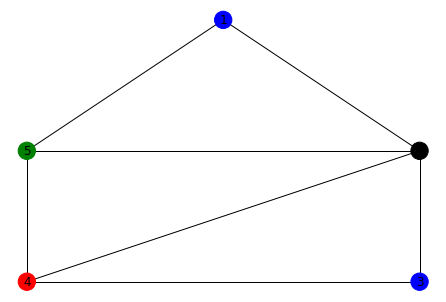

In [9]:
colors = ['red', 'blue', 'green', 'black', 'cyan', 'orange', 'yellow', 'purple', 'olive', 'grey']
color_map = np.empty(len(graph.nodes), dtype=object)

for i in solution.sample:
    if type(i) is tuple and solution.sample[i] > 0.5:
        color_map[i[0]-1] = colors[i[1]]

print(graph.nodes)
print(color_map)
        
nx.draw(graph, pos=pos, node_color=color_map, with_labels=True)